<a href="https://colab.research.google.com/github/KshitijShinde/bml/blob/main/bml_expt_8_k_means_manual_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

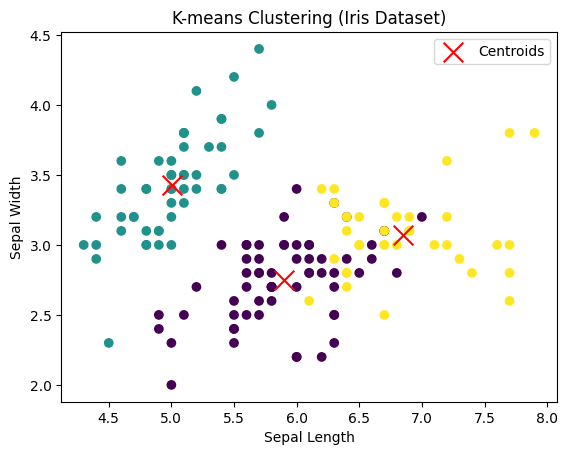

Final Centroids:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Labels (Cluster Assignments) for each data point:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Step 1: Load Iris dataset
data = load_iris()
X = data.data  # Features

# Step 2: K-means Algorithm
def kmeans(X, k, max_iters=100):
    # Step 2a: Initialize centroids randomly
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for i in range(max_iters):
        # Step 2b: Assign points to nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2c: Recompute centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Step 2d: Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Step 3: Run K-means with k=3
k = 3
centroids, labels = kmeans(X, k)

# Step 4: Visualize results (only for the first two features for simplicity)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-means Clustering (Iris Dataset)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

# Optionally, check final centroids and labels
print("Final Centroids:\n", centroids)
print("Labels (Cluster Assignments) for each data point:\n", labels)
